In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from pathlib import Path
from typing import Dict

plt.style.use("ggplot")

In [2]:
def sample_name(s: str) -> str:
    for sfx in ["_rep1", "_rep2", "-singleplex", "-multiplex"]:
        s = s.replace(sfx, "")
    return s

In [3]:
smear_df = pd.read_csv("../../docs/smear_results.csv", index_col="sample")

In [4]:
ont_comp_df = pd.read_html("../../results/report/nanopore_composition.html")
assert len(ont_comp_df) == 1
ont_comp_df = ont_comp_df[0]
ont_comp_df.columns = [t[1] if t[0].startswith("Unnam") else t[0] for t in ont_comp_df.columns]
ont_comp_df["source"] = "sputum"
ont_comp_df["technology"] = "nanopore"
ont_comp_df["smear"] = [smear_df.at[sample_name(s), "smear_result"] for s in ont_comp_df["sample"]]
# ont_comp_df

In [5]:
illumina_df1 = pd.read_html("../../results/report/illumina_culture_composition.html")
assert len(illumina_df1) == 1
illumina_df1 = illumina_df1[0]
illumina_df1.columns = [t[1] if t[0].startswith("Unnam") else t[0] for t in illumina_df1.columns]
illumina_df1["source"] = "culture"
illumina_df1["technology"] = "illumina"
illumina_df1["smear"] = [smear_df.at[sample_name(s), "smear_result"] for s in illumina_df1["sample"]]
# illumina_df1

In [6]:
illumina_df2 = pd.read_html("../../results/report/illumina_sputum_composition.html")
assert len(illumina_df2) == 1
illumina_df2 = illumina_df2[0]
illumina_df2.columns = [t[1] if t[0].startswith("Unnam") else t[0] for t in illumina_df2.columns]
illumina_df2["source"] = "sputum"
illumina_df2["technology"] = "illumina"
illumina_df2["smear"] = [smear_df.at[sample_name(s), "smear_result"] for s in illumina_df2["sample"]]
# illumina_df2

In [7]:
comp_df = pd.concat([ont_comp_df, illumina_df1, illumina_df2])
comp_df.reset_index(inplace=True)
comp_df

,index,sample,keep,keep%,contam,contam%,unmapped,unmapped%,total,coverage,lineage,species,source,technology,smear
0,0,P201,895,0.11%,644877,77.08%,190847,22.81%,836619,0.2,4.10,Mycobacterium_tuberculosis,sputum,nanopore,+
1,1,P202,24865,1.83%,1153816,85.11%,176981,13.05%,1355662,6.0,1.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+
2,2,P203-multiplex,3768,0.46%,783301,95.23%,35497,4.32%,822566,1.1,4.10,Mycobacterium_tuberculosis,sputum,nanopore,+
3,3,P203-singleplex,19938,0.45%,4257677,96.47%,136039,3.08%,4413654,6.6,4.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+
4,4,P204,414,0.07%,57693,10.05%,515903,89.88%,574010,0.1,4.10,Unknown,sputum,nanopore,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,85,Test_NC2,7555,0.37%,1977115,96.53%,63620,3.11%,2048290,0.5,4.10,Mycobacterium_tuberculosis,sputum,illumina,-
231,86,Test_NC3,22874,1.04%,2080051,94.85%,89957,4.10%,2192882,1.5,4.10,Mycobacterium_tuberculosis,sputum,illumina,-
232,87,Test_NC4,14074,1.00%,1316174,93.65%,75229,5.35%,1405477,0.9,4.10,Mycobacterium_tuberculosis,sputum,illumina,-
233,88,Test_NC5,28061,1.61%,1554571,88.97%,164633,9.42%,1747265,1.9,4.10,Mycobacterium_tuberculosis,sputum,illumina,-


Firstly, let's take a look at how many of the Nanopore-sequenced samples were sequenced on Illumina (sputum and culture)

In [8]:
ont_samples = {sample_name(s) for s in comp_df.query("technology=='nanopore'")["sample"]}
print(f"{len(ont_samples)} Nanopore sputum samples")

72 Nanopore sputum samples


In [9]:
culture_samples = {sample_name(s) for s in comp_df.query("technology=='illumina' and source=='culture'")["sample"]}
print(f"{len(culture_samples)} Illumina cultured samples")

52 Illumina cultured samples


In [10]:
sputum_samples = {sample_name(s) for s in comp_df.query("technology=='illumina' and source=='sputum'")["sample"]}
print(f"{len(sputum_samples)} Illumina sputum samples")

71 Illumina sputum samples


In [11]:
print(f"Samples sequenced on Nanopore but no Illumina sputum data: {ont_samples - sputum_samples}")

Samples sequenced on Nanopore but no Illumina sputum data: {'P226'}


This sample, `P226`, did have its sputum sequenced on Illumina according to the spreadsheet, but when Martin retrieved the data from the Oxford servers, he could not find it anywhere. Here is the information I have for its Illumina sputum sequencing:

| Id Sample  | Source | Date extraction | guid                                 | Reference Genome | Plate name          | Row ID | Column ID |
|------------|--------|-----------------|--------------------------------------|------------------|---------------------|--------|-----------|
| Mada-P226S | Sputum | 21/8/19         | fad80bbf-50e2-403f-beed-d40fafc5202f | R00000039        | PR2832_CRyPTIC_Peru | E      | 6         |



In [12]:
print(f"Samples sequenced on Nanopore but no Illumina culture data:\n {sorted(ont_samples - culture_samples)}")

Samples sequenced on Nanopore but no Illumina culture data:
 ['P201', 'P206', 'P207', 'P208', 'P213', 'P219', 'P220', 'PCtrl-1', 'PCtrl-2', 'PCtrl-3', 'PCtrl-4', 'PCtrl-5', 'PCtrl-6', 'Test_18', 'Test_NC1', 'Test_NC2', 'Test_NC3', 'Test_NC4', 'Test_NC5', 'Test_NC6']


In [13]:
samples_in_all = ont_samples & culture_samples & sputum_samples

In [14]:
print(f"There are {len(samples_in_all)} samples with data for all three conditions")

There are 51 samples with data for all three conditions


## Negative controls
According to the study protocol, each site collected 6 negative controls - smear microscopy negative and MTB/RIF Xpert negative.

Let's check if Nanopore got the species correct for these - i.e., didn't call Mtb

In [11]:
comp_df.loc[comp_df["sample"].map(lambda r: "NC" in r or "PC" in r)]

,index,sample,keep,keep%,contam,contam%,unmapped,unmapped%,total,coverage,lineage,species,source,technology,smear
36,36,PCtrl-1-multiplex,114,0.01%,755970,91.07%,73987,8.91%,830071,0.1,4.10,Unknown,sputum,nanopore,-
37,37,PCtrl-1-singleplex,489,0.01%,4732561,93.11%,349673,6.88%,5082723,0.2,4.10,Unknown,sputum,nanopore,-
38,38,PCtrl-2,332,0.01%,2473969,83.15%,500914,16.84%,2975215,0.1,4.10,Unknown,sputum,nanopore,-
39,39,PCtrl-3-multiplex,93,0.01%,711772,84.96%,125882,15.03%,837747,0.0,4.10,Unknown,sputum,nanopore,-
40,40,PCtrl-3-singleplex,935,0.01%,10283833,87.18%,1511432,12.81%,11796200,0.3,4.10,Unknown,sputum,nanopore,-
41,41,PCtrl-4,67,0.01%,899563,92.26%,75354,7.73%,974984,0.0,4.10,Unknown,sputum,nanopore,-
42,42,PCtrl-5-multiplex,106,0.03%,347714,88.80%,43737,11.17%,391557,0.1,4.10,Unknown,sputum,nanopore,-
43,43,PCtrl-5-singleplex,99,0.01%,1084775,88.34%,143102,11.65%,1227976,0.1,4.10,Unknown,sputum,nanopore,-
44,44,PCtrl-6,557,0.00%,10961081,93.86%,716200,6.13%,11677838,0.1,4.10,Unknown,sputum,nanopore,-
81,81,Test_NC1-multiplex,212,0.01%,1575927,92.75%,122899,7.23%,1699038,0.1,4.10,Unknown,sputum,nanopore,-


So all Nanopore negative controls have a species call (from Mykrobe) of "Unknown" with all having less than 1300 reads that map to the H37Rv reference genome.  
However, there are seven (1 Madagascar and all 6 Mumbai) Illumina sputum negative controls with an Mtb call. Most of these samples also have 1-2x coverage over the Mtb genome. However, there is considerable overlap in the MTBC genomes, so if the negative control patients had an MTBC infection, this could confound...

## Read depth (coverage)
The sequencing from culture returned at least 100x coverage for all samples (except one which had 85x).

Let's have a look at what sort of coverage we got from sputum for Nanopore and Illumina.

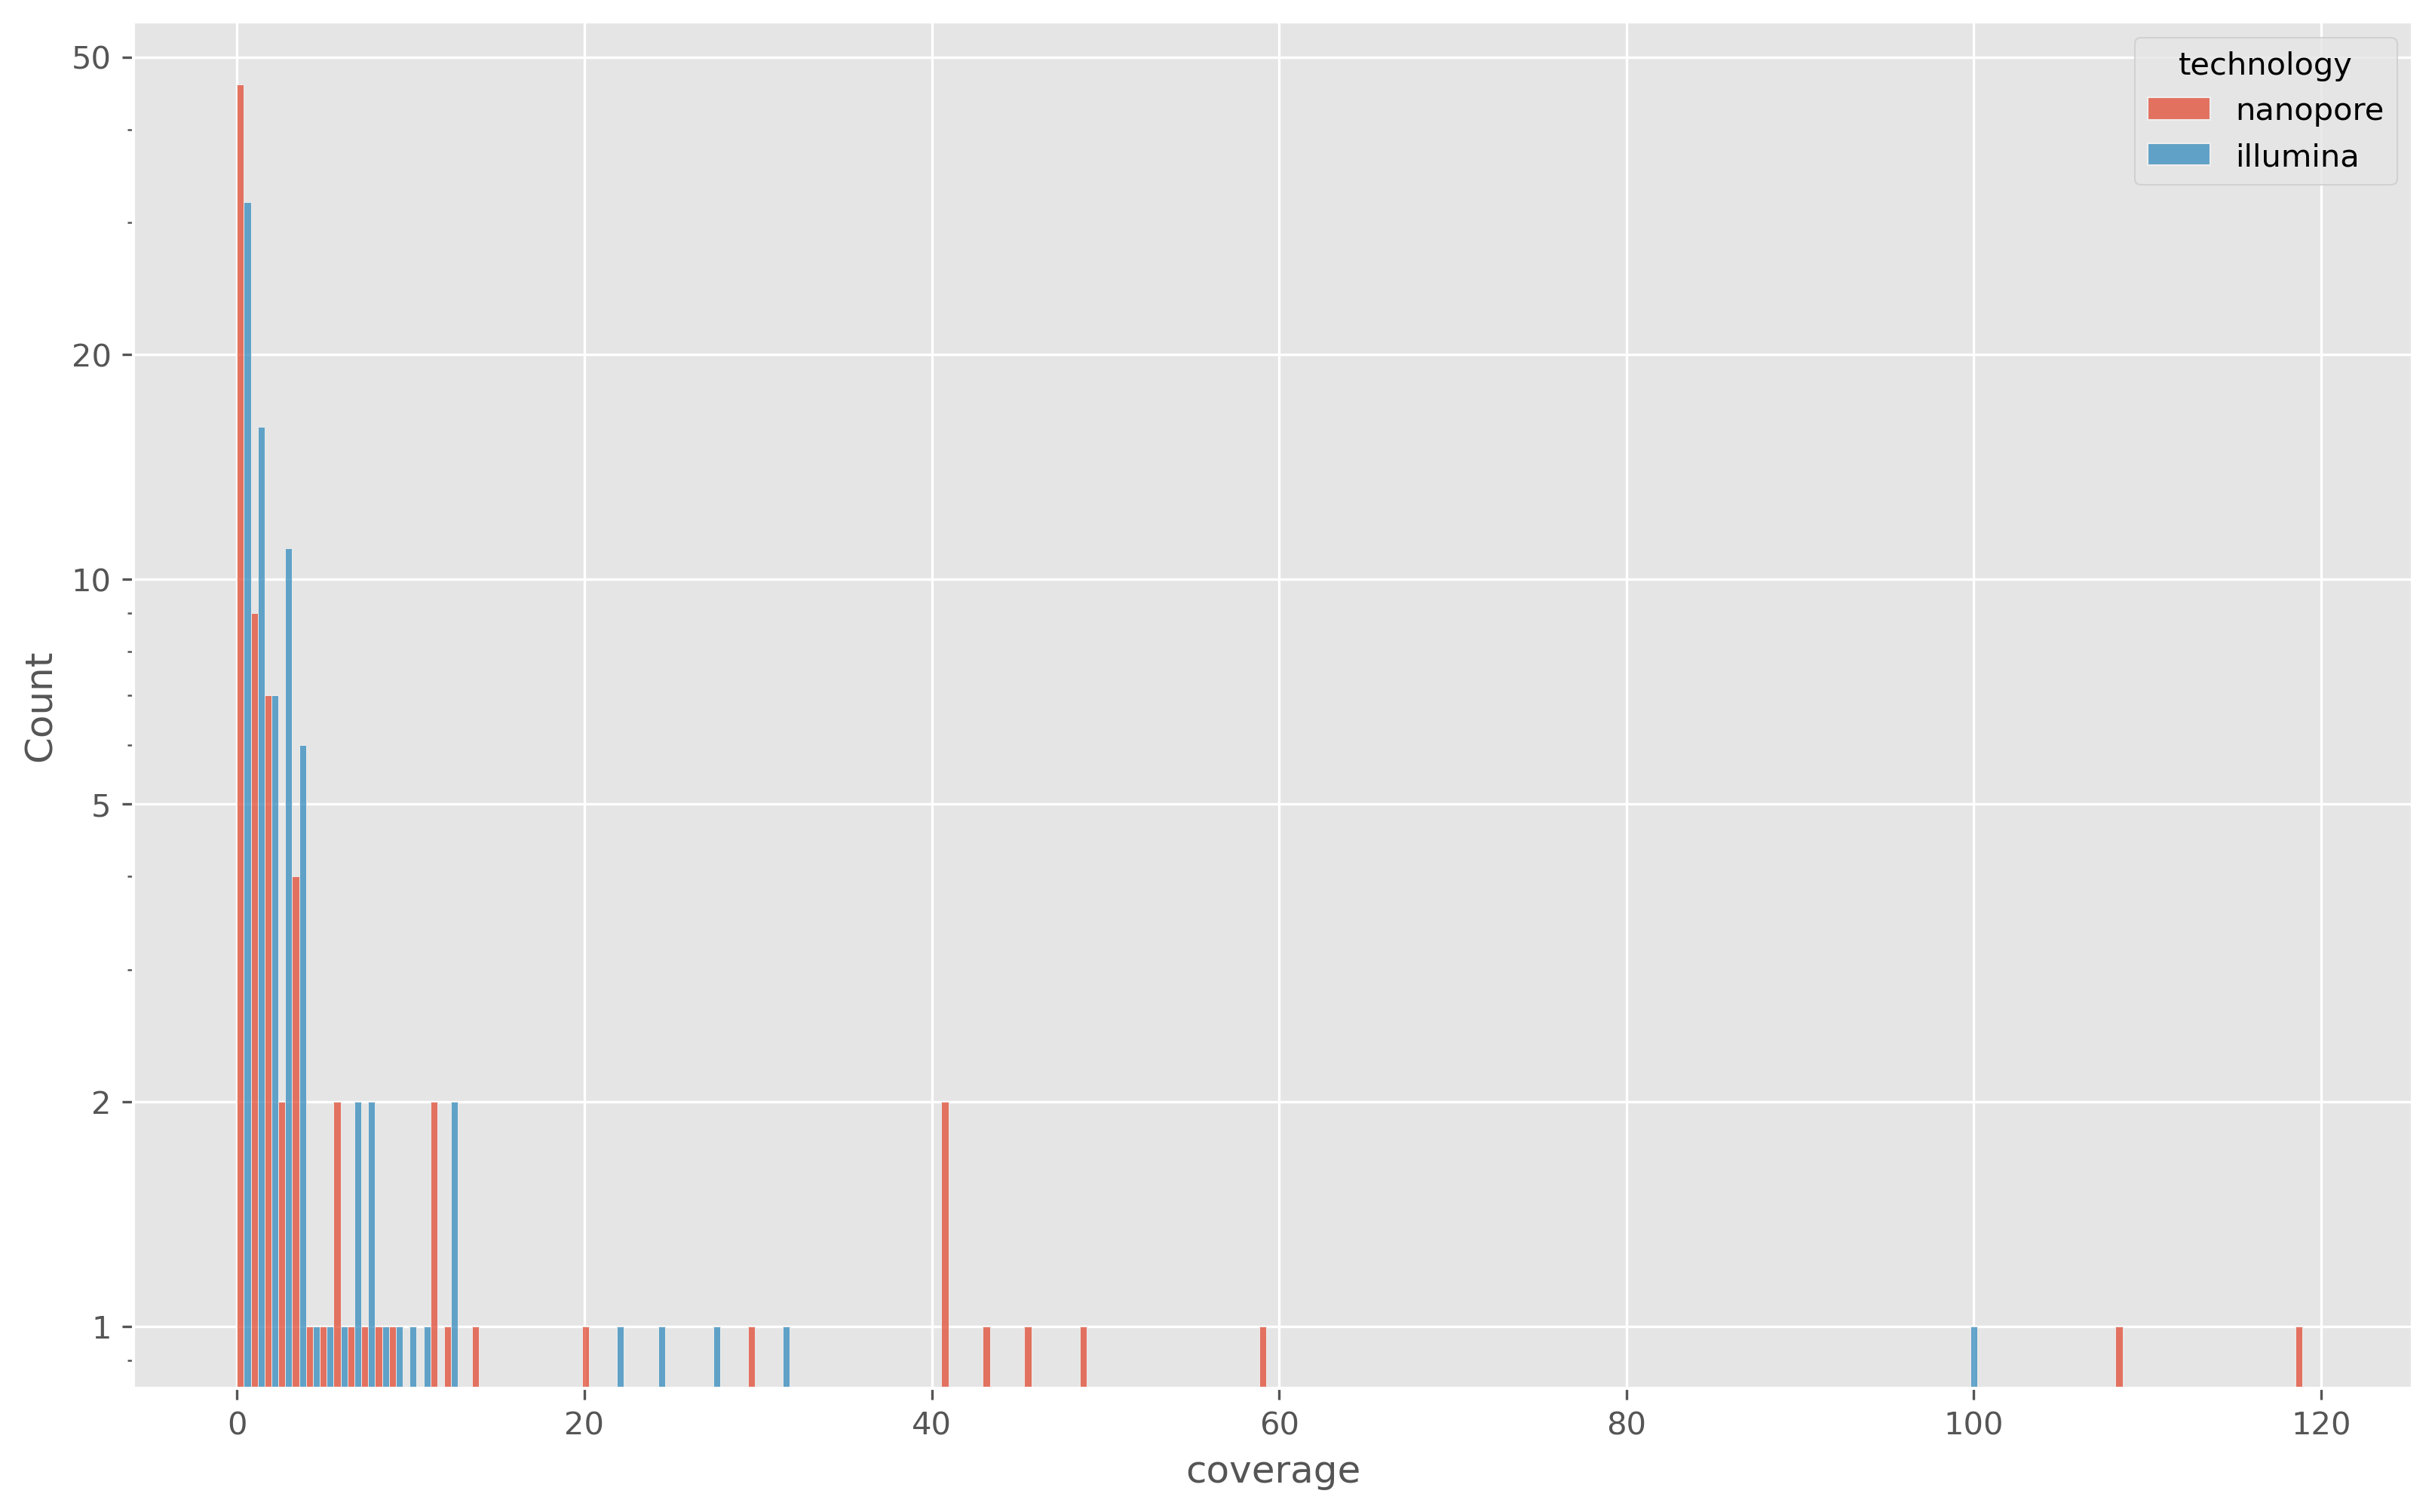

In [16]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
data = comp_df.query("source=='sputum'")
x = "coverage"
hue = "technology"
sns.histplot(data=data, x=x, hue=hue, ax=ax, multiple="dodge", bins=150)
ax.set_yscale("log")
ticks = [1, 2, 5, 10, 20, 50]
ax.set_yticks(ticks)
_ = ax.set_yticklabels(ticks)

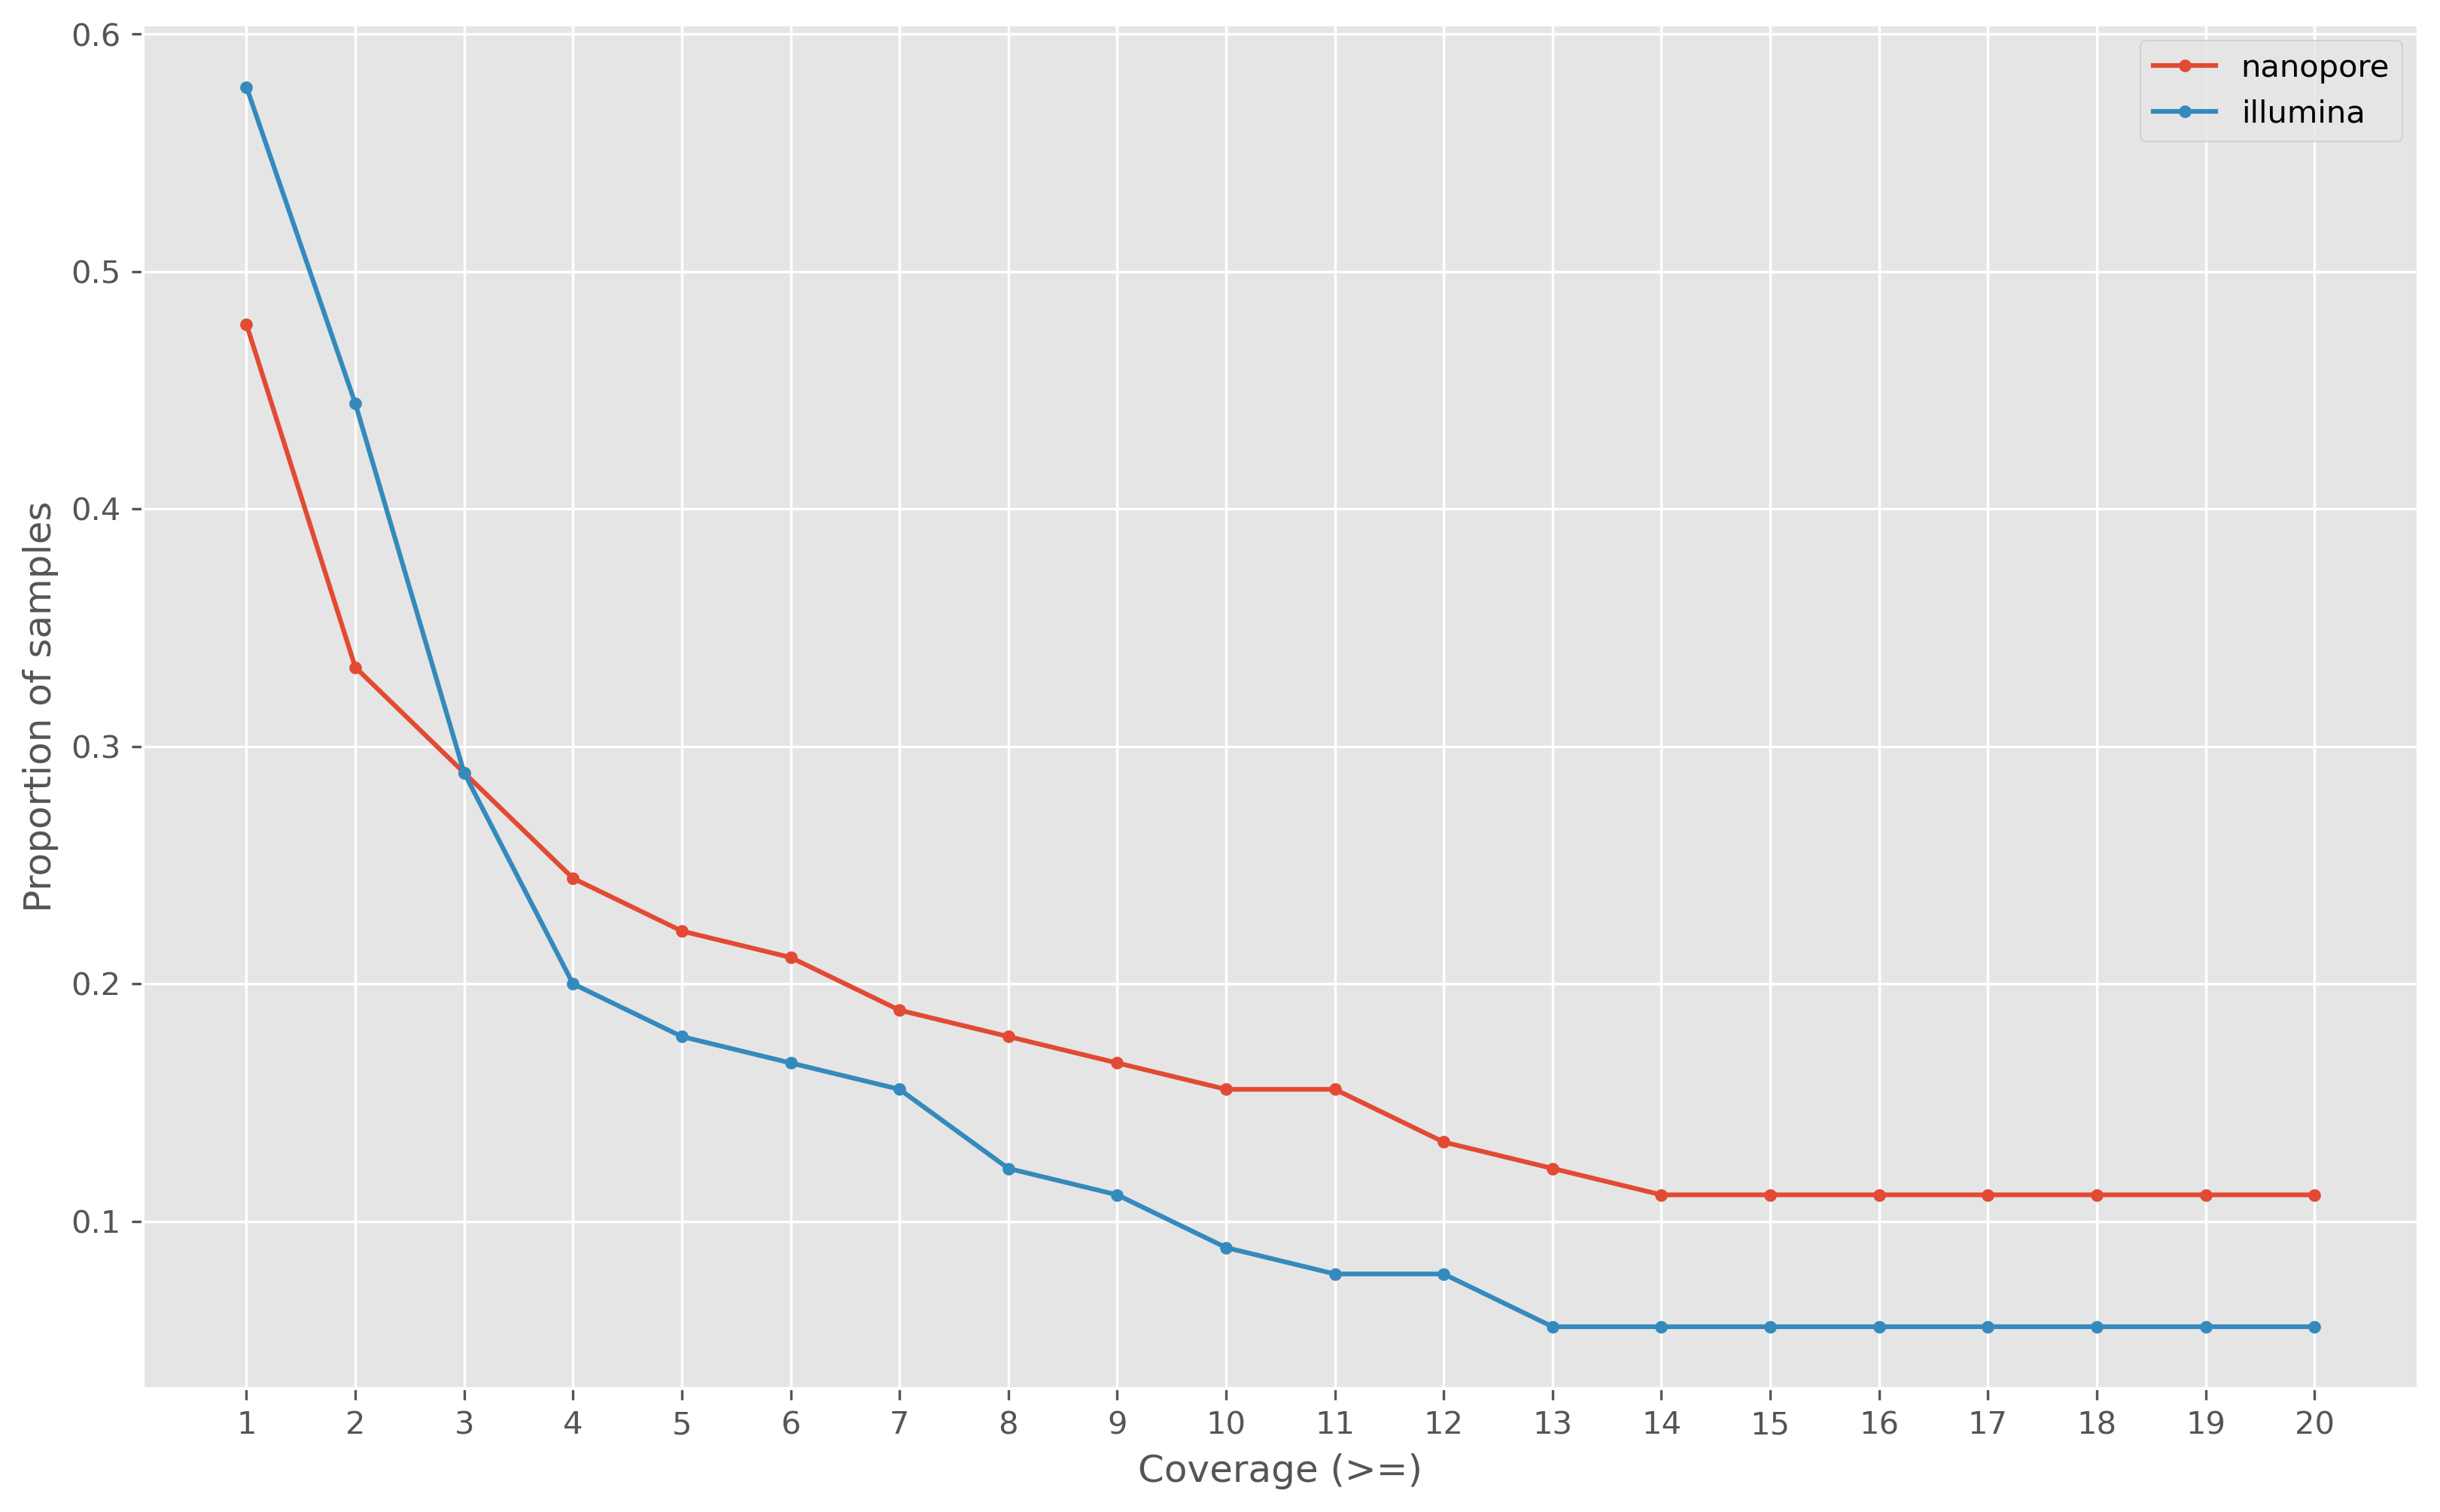

In [17]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
ont_ys = []
ill_ys = []
for y in range(1, 21):
    d = data.query("coverage>=@y")
    q = "technology=='nanopore'"
    p = len(d.query(q)) / len(data.query(q))
    ont_ys.append(p)
    q = "technology=='illumina'"
    p = len(d.query(q)) / len(data.query(q))
    ill_ys.append(p)
    
ax.plot(range(1, 21), ont_ys, label="nanopore", marker=".")
ax.plot(range(1, 21), ill_ys, label="illumina", marker=".")
ax.legend()
ax.set(ylabel="Proportion of samples", xlabel="Coverage (>=)")
_ = ax.set_xticks(range(1, 21))

In [18]:
for y in range(2, 22, 2):
    d = data.query("coverage>=@y")
    q = "technology=='nanopore'"
    p = len(d.query(q)) / len(data.query(q))
    print(f"{p:.1%} ({len(d.query(q))}/{len(data.query(q))}) nanopore samples have coverage >= {y}")
    q = "technology=='illumina'"
    p = len(d.query(q)) / len(data.query(q))
    print(f"{p:.1%} ({len(d.query(q))}/{len(data.query(q))}) illumina samples have coverage >= {y}")

33.3% (30/90) nanopore samples have coverage >= 2
44.4% (40/90) illumina samples have coverage >= 2
24.4% (22/90) nanopore samples have coverage >= 4
20.0% (18/90) illumina samples have coverage >= 4
21.1% (19/90) nanopore samples have coverage >= 6
16.7% (15/90) illumina samples have coverage >= 6
17.8% (16/90) nanopore samples have coverage >= 8
12.2% (11/90) illumina samples have coverage >= 8
15.6% (14/90) nanopore samples have coverage >= 10
8.9% (8/90) illumina samples have coverage >= 10
13.3% (12/90) nanopore samples have coverage >= 12
7.8% (7/90) illumina samples have coverage >= 12
11.1% (10/90) nanopore samples have coverage >= 14
5.6% (5/90) illumina samples have coverage >= 14
11.1% (10/90) nanopore samples have coverage >= 16
5.6% (5/90) illumina samples have coverage >= 16
11.1% (10/90) nanopore samples have coverage >= 18
5.6% (5/90) illumina samples have coverage >= 18
11.1% (10/90) nanopore samples have coverage >= 20
5.6% (5/90) illumina samples have coverage >= 20


Let's look at read coverage by smear result

In [86]:
def legend_without_duplicate_labels(ax, title=""):
    handles, labels = ax.get_legend_handles_labels()
    labels = list(map(str.capitalize, labels))
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), title=title)

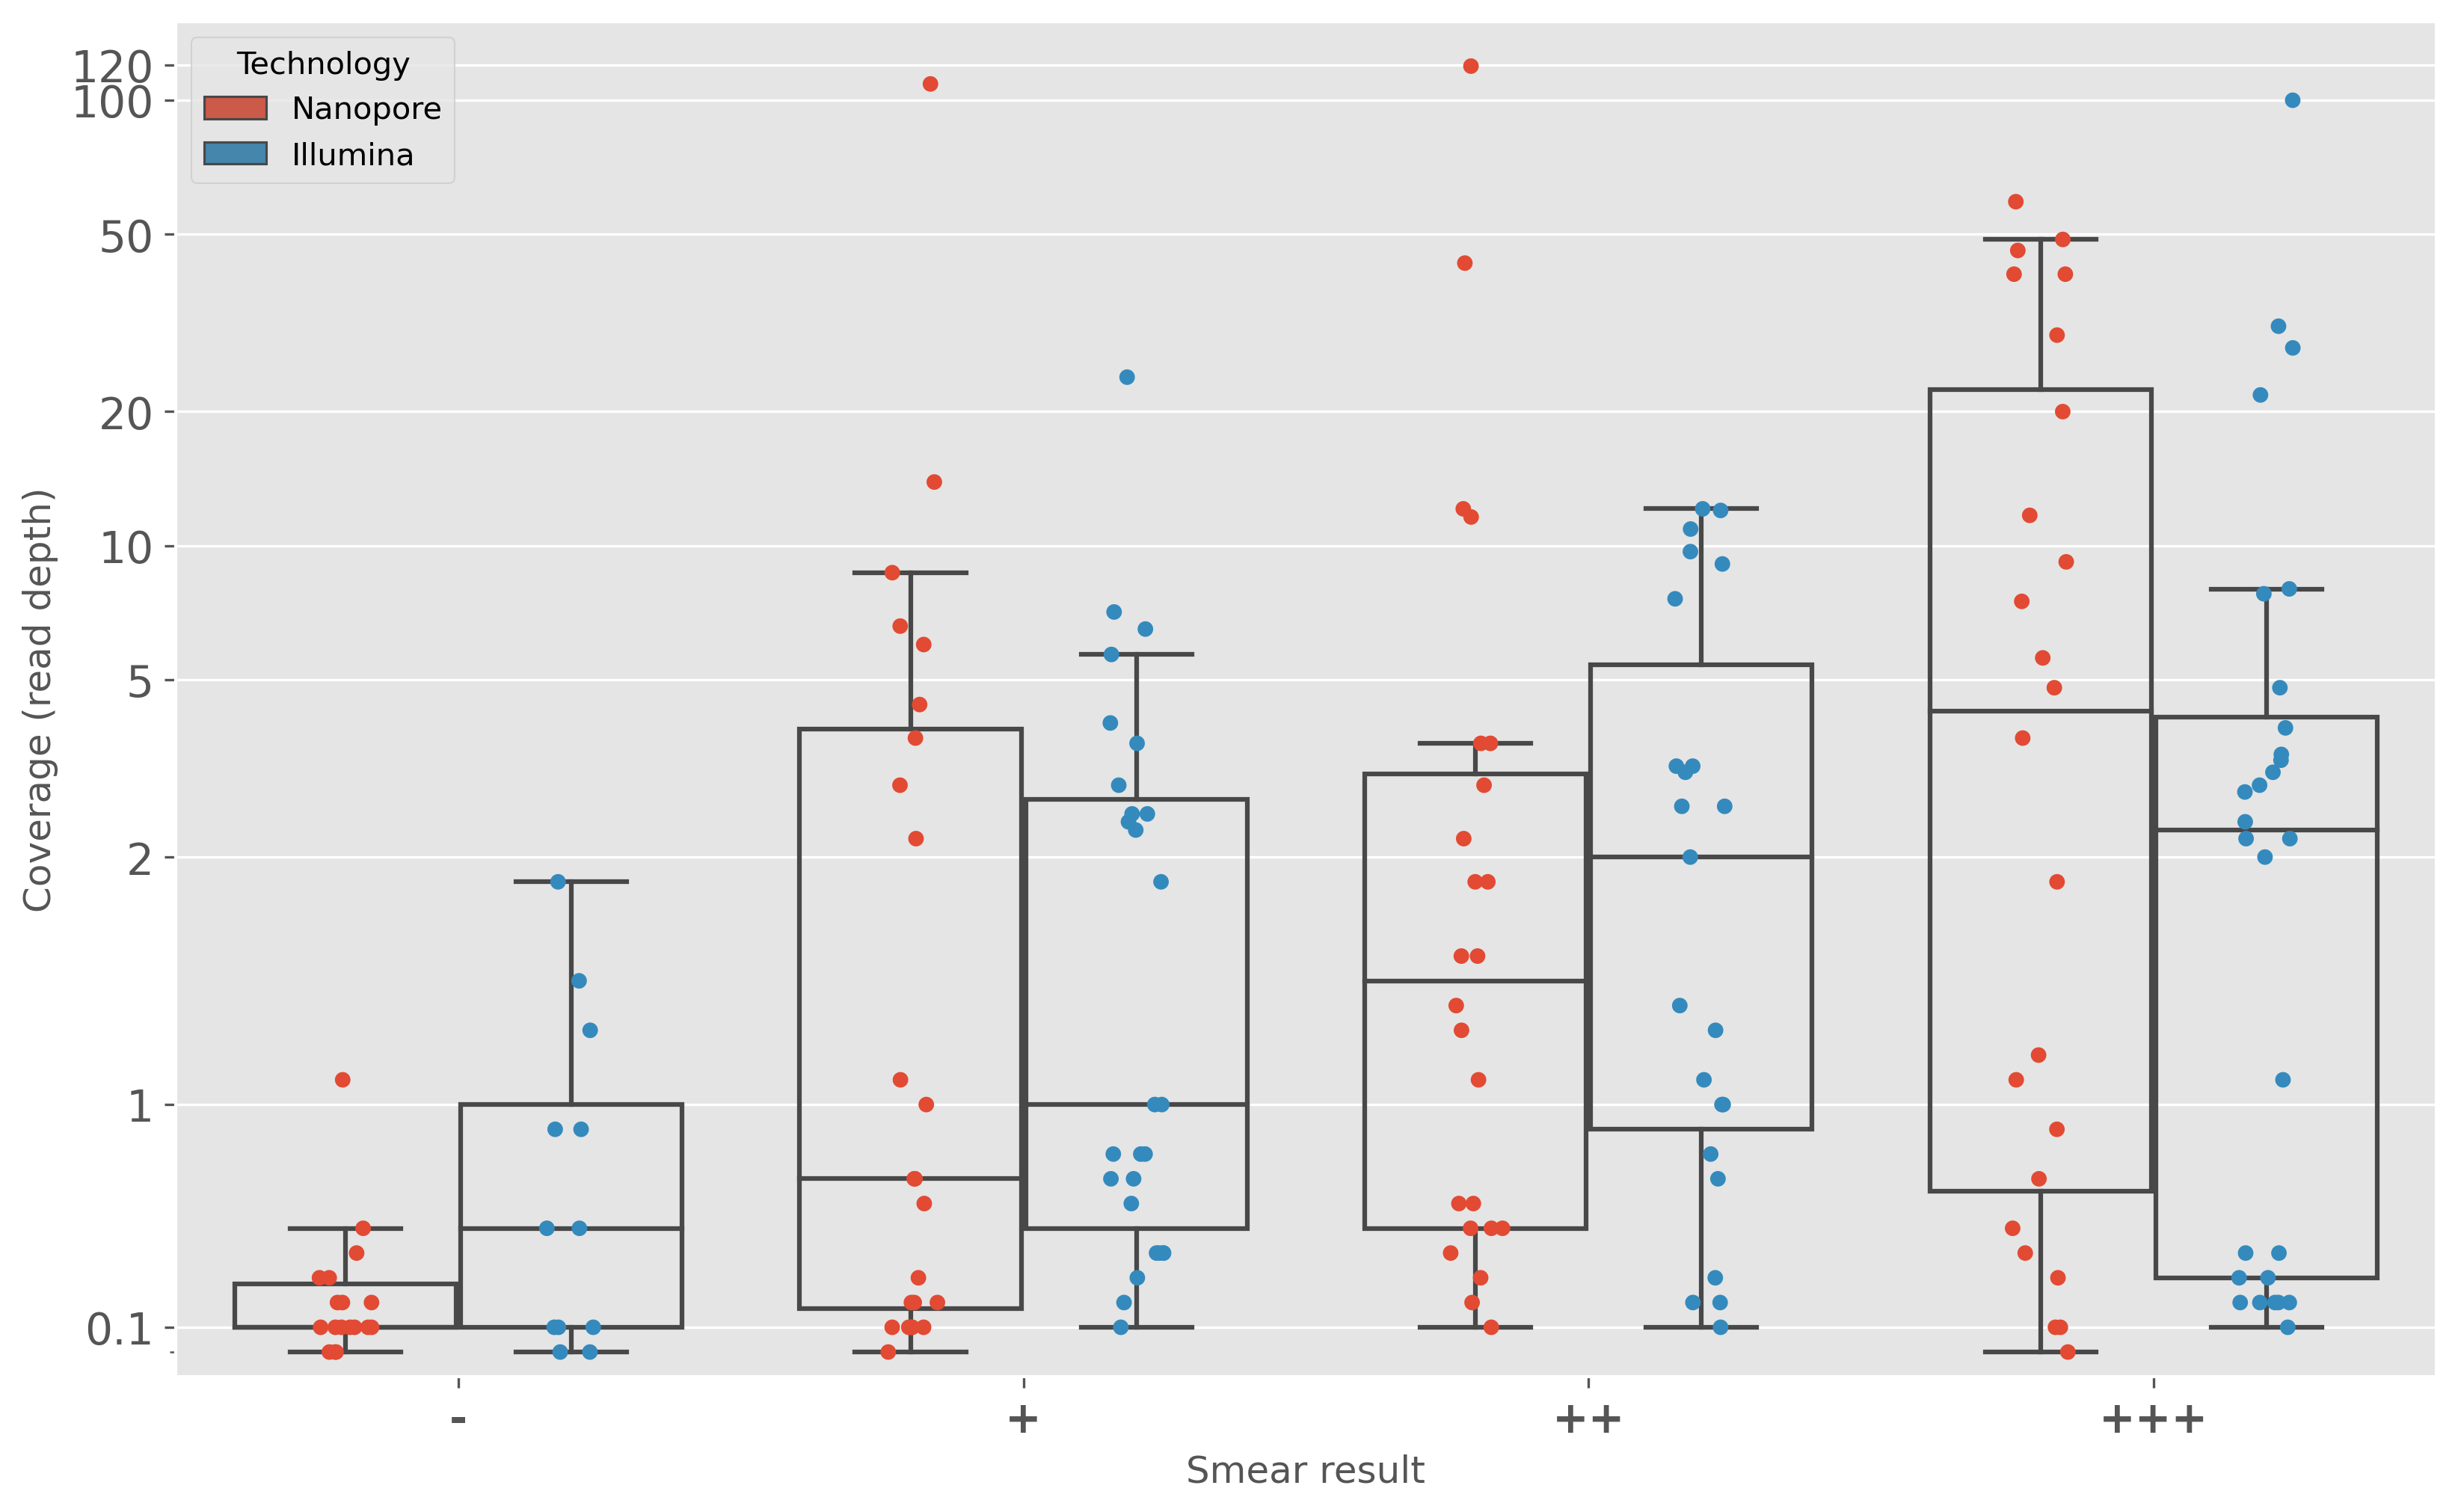

In [87]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
data = comp_df.query("source=='sputum'")
lsize = 14  # label size
x = "smear"
y = "coverage"
hue = "technology"
order = ["-", "+", "++", "+++"]
sns.boxplot(data=data, x=x, y=y, order=order, hue=hue, ax=ax, boxprops=dict(facecolor="none"), fliersize=0)
sns.stripplot(data=data, x=x, y=y, hue=hue, order=order, ax=ax, dodge=True)
ax.set_yscale("symlog")
ticks = [0.1, 1, 2, 5, 10, 20, 50, 100, 120]
ax.set_yticks(ticks)
_ = ax.set_yticklabels(ticks)
ax.set_xlabel("Smear result")
legend_without_duplicate_labels(ax, "Technology")
ax.set_ylim((-0.1, 150))
_ = ax.set_ylabel("Coverage (read depth)")
for label in (ax.get_xticklabels() + ax.get_xticklabels()):
    label.set_fontsize(lsize)
    label.set_fontweight('bold')
ax.yaxis.set_tick_params(labelsize=lsize)

Load the krona composition data

In [12]:
def load_krona_counts(path: Path) -> Dict[str, int]:
    counter = defaultdict(int)
    with open(path) as fp:
        for row in map(str.rstrip, fp):
            count, organism = row.split("\t")[:2]
            counter[organism] += int(count)
    total_reads = sum(counter.values())
    for k, v in counter.items():
        counter[k] = v/total_reads
    return counter

In [13]:
tsvs = list(Path("../../results/").rglob("*.krona.tsv"))

In [14]:
counts = dict()
for p in tsvs:
    tech = p.parts[3]
    if tech == "illumina":
        source = p.parts[-2]
    else:
        source = "sputum"
    name = p.name.split(".")[0]
    counts[(tech, source, name)] = load_krona_counts(p)

In [15]:
counts

{('illumina', 'sputum', 'Test_19'): defaultdict(int,
             {'NTM': 0.05690190288713911,
              'Unmapped': 0.1354957349081365,
              'Virus': 6.233595800524934e-06,
              'Bacteria': 0.6017339238845144,
              'TB': 0.0738507217847769,
              'Human': 0.13201148293963255}),
 ('illumina', 'sputum', 'Test_56'): defaultdict(int,
             {'NTM': 0.0007553644548045964,
              'Unmapped': 0.0490321712166442,
              'Virus': 1.3145918113550233e-07,
              'Bacteria': 0.07614602170338497,
              'TB': 0.009214105464968494,
              'Human': 0.8648522057010166}),
 ('illumina', 'sputum', 'P213'): defaultdict(int,
             {'NTM': 0.02293827505347731,
              'Unmapped': 0.23870360705385957,
              'Virus': 4.410499930167084e-05,
              'Bacteria': 0.18764104411235014,
              'TB': 0.01872992303677622,
              'Human': 0.5319430457442351}),
 ('illumina', 'sputum', 'P207'): defaul

In [16]:
comp_stack = pd.DataFrame(counts).T.reset_index().rename(columns={"level_0": "technology", "level_1": "source", "level_2": "name"}).fillna(0).melt(
    value_vars=["NTM", "Unmapped", "Virus", "Bacteria", "TB", "Human"], 
    id_vars=["technology", "name", "source"],
    var_name="Organism",
    value_name="num_reads"
)

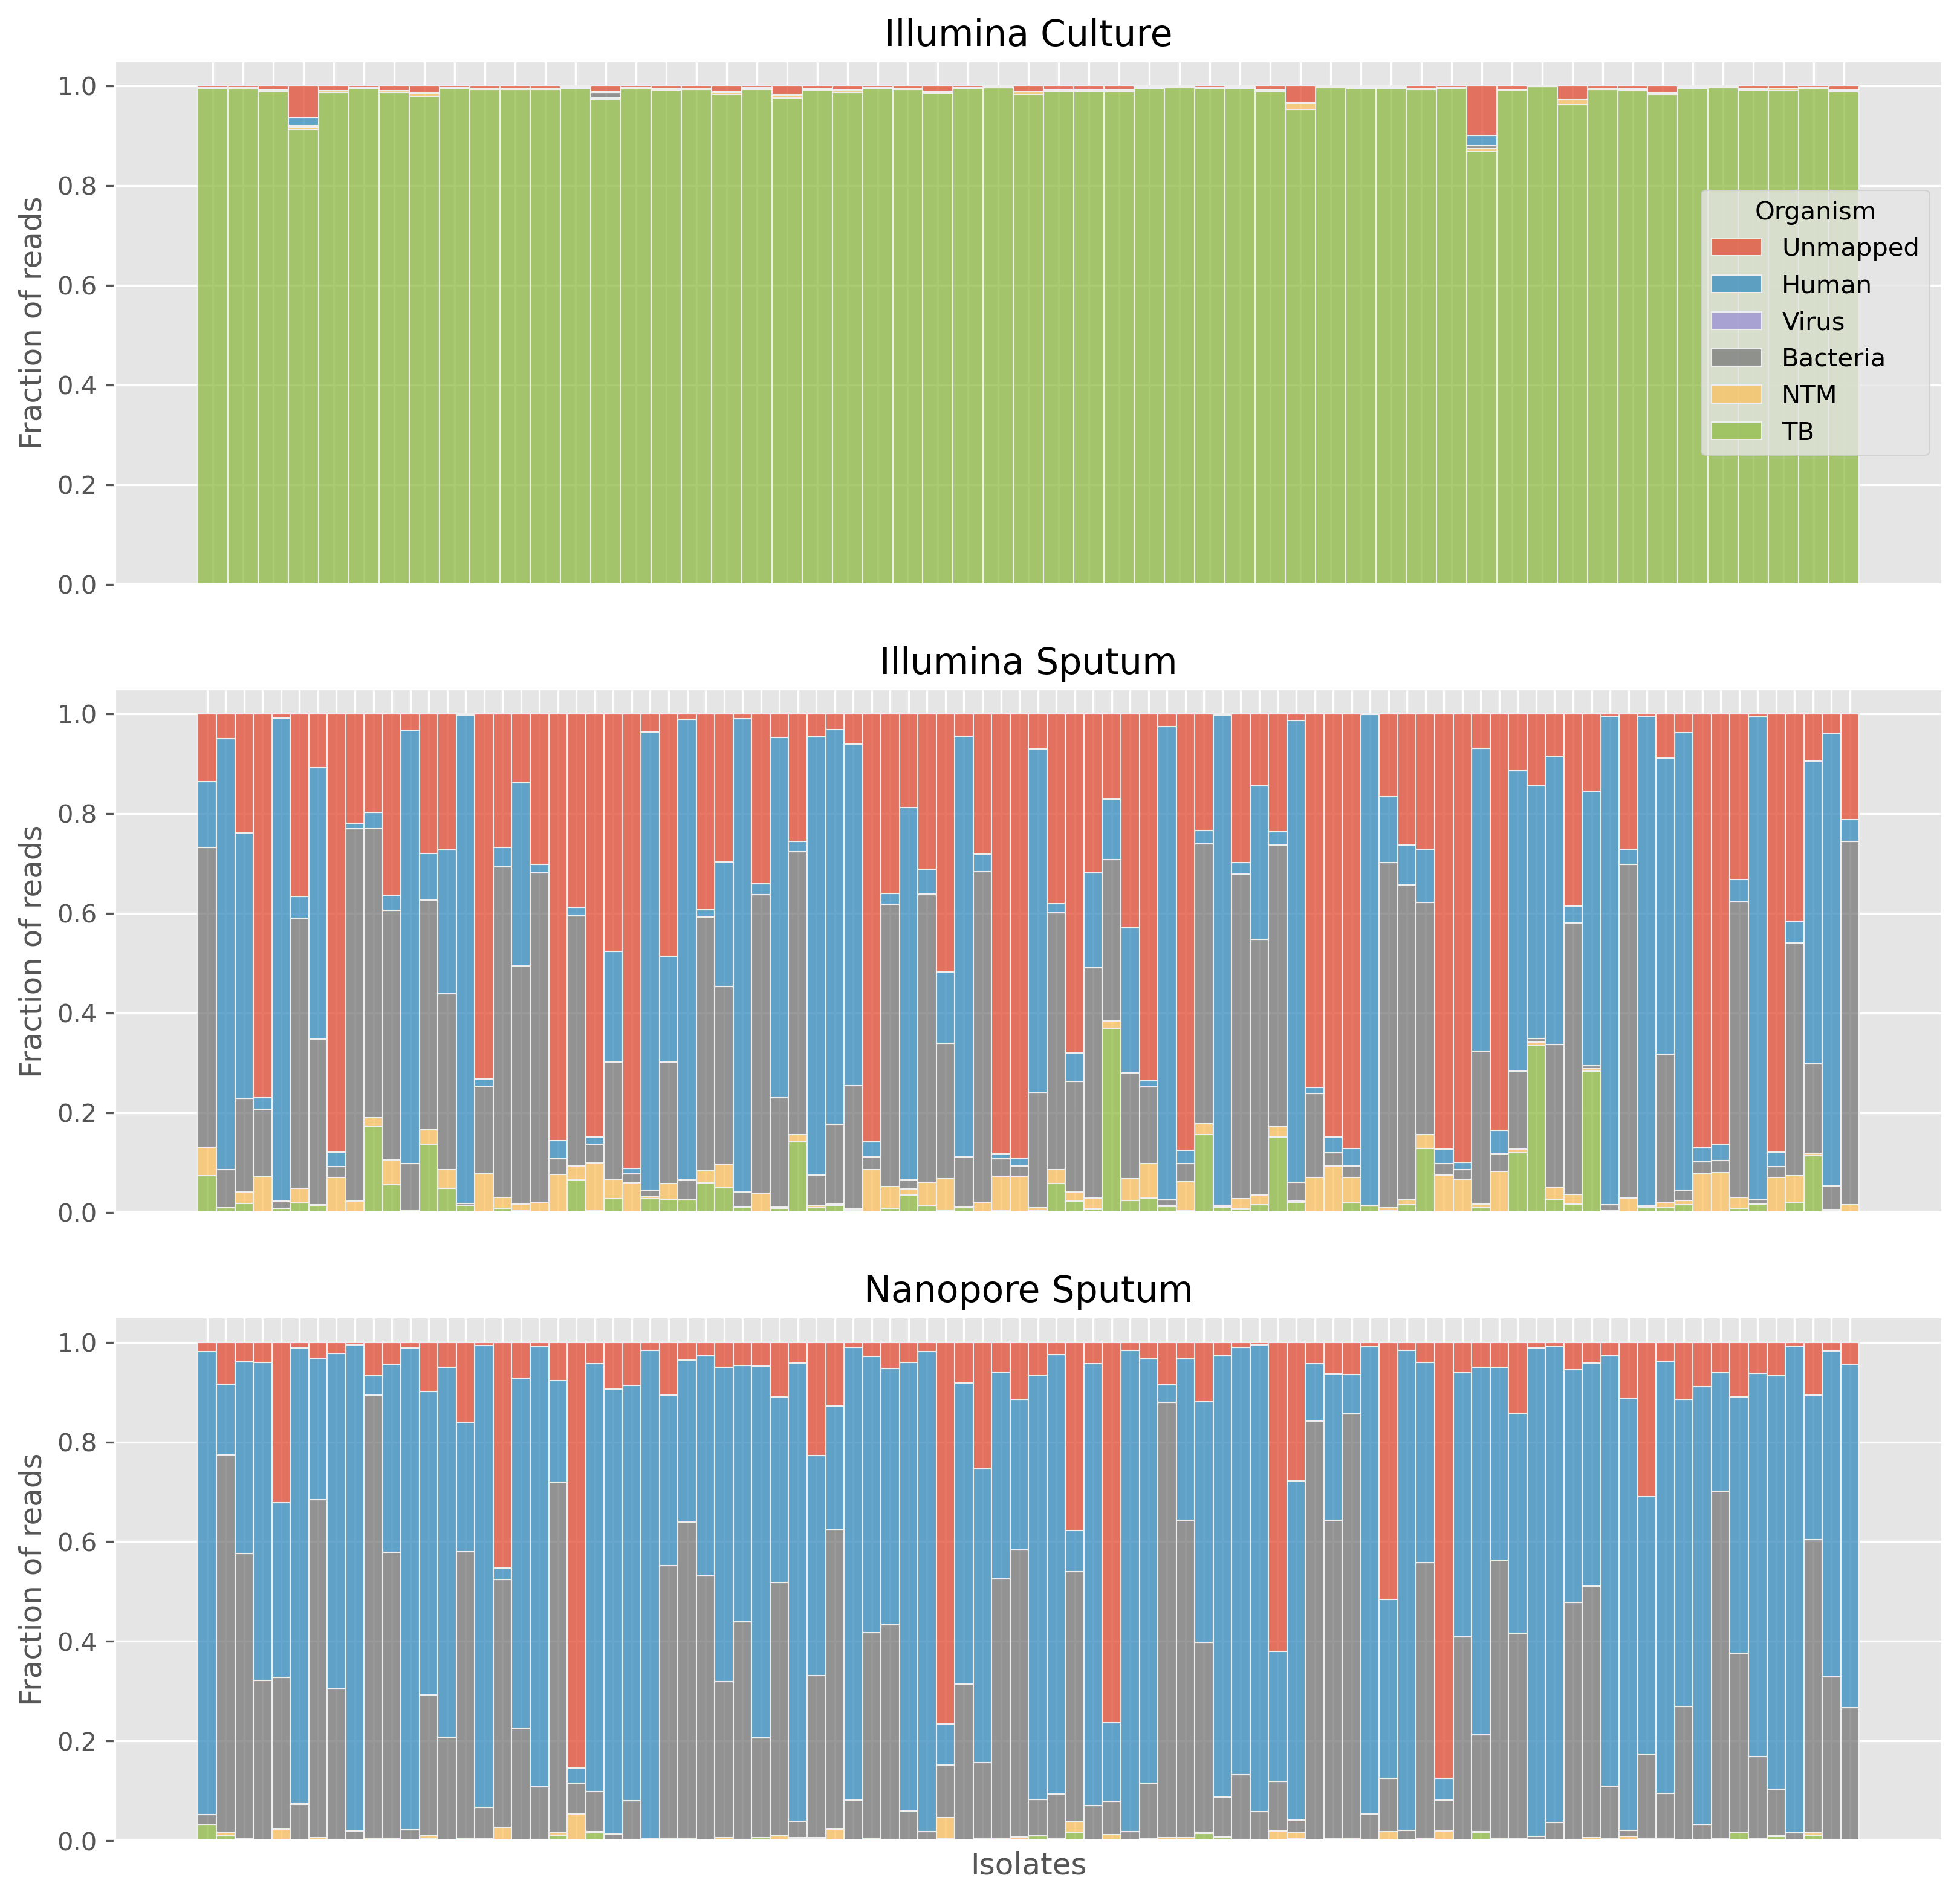

In [17]:
cats = [("illumina", "culture"), ("illumina", "sputum"), ("nanopore", "sputum")]
fig, axes = plt.subplots(figsize=(13, 13), dpi=300, nrows=len(cats))

for (tech, src), ax in zip(cats, axes.flatten()):
    data = comp_stack.query("technology==@tech and source==@src")

    ax = sns.histplot(
        data=data,
        x='name',
        # Use the value variable here to turn histogram counts into weighted
        # values.
        weights='num_reads',
        hue='Organism',
        multiple='stack',
    #     palette=['#24b1d1', '#ae24d1'],
        # Add white borders to the bars.
    #     edgecolor='white',
        # Shrink the bars a bit so they don't touch.
    #     shrink=0.8,
    #     stat="percent",
    #     common_norm=False
        hue_order=reversed(["TB", "NTM", "Bacteria", "Virus", "Human", "Unmapped"]),
        ax=ax
    )
    xlabel = "Isolates" if tech == "nanopore" else None
    ax.set(title=f"{tech.capitalize()} {src.capitalize()}", xlabel=xlabel, ylabel="Fraction of reads")
    if not src == "culture":
        ax.get_legend().remove()
    else:
        sns.move_legend(ax, "center right")

    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

Let's look at how coverage changes when multiplexed

In [18]:
comp_df

,index,sample,keep,keep%,contam,contam%,unmapped,unmapped%,total,coverage,lineage,species,source,technology,smear
0,0,P201,895,0.11%,644877,77.08%,190847,22.81%,836619,0.2,4.10,Mycobacterium_tuberculosis,sputum,nanopore,+
1,1,P202,24865,1.83%,1153816,85.11%,176981,13.05%,1355662,6.0,1.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+
2,2,P203-multiplex,3768,0.46%,783301,95.23%,35497,4.32%,822566,1.1,4.10,Mycobacterium_tuberculosis,sputum,nanopore,+
3,3,P203-singleplex,19938,0.45%,4257677,96.47%,136039,3.08%,4413654,6.6,4.1.2,Mycobacterium_tuberculosis,sputum,nanopore,+
4,4,P204,414,0.07%,57693,10.05%,515903,89.88%,574010,0.1,4.10,Unknown,sputum,nanopore,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,85,Test_NC2,7555,0.37%,1977115,96.53%,63620,3.11%,2048290,0.5,4.10,Mycobacterium_tuberculosis,sputum,illumina,-
231,86,Test_NC3,22874,1.04%,2080051,94.85%,89957,4.10%,2192882,1.5,4.10,Mycobacterium_tuberculosis,sputum,illumina,-
232,87,Test_NC4,14074,1.00%,1316174,93.65%,75229,5.35%,1405477,0.9,4.10,Mycobacterium_tuberculosis,sputum,illumina,-
233,88,Test_NC5,28061,1.61%,1554571,88.97%,164633,9.42%,1747265,1.9,4.10,Mycobacterium_tuberculosis,sputum,illumina,-


In [19]:
singles = set()
multis = set()
data = []
for i, row in comp_df.query("technology=='nanopore'").iterrows():
    sample = row["sample"]
    name = sample_name(sample)
    multi = "monoplex" if not "multi" in sample else "multiplex"
    if multi == "multiplex":
        multis.add(name)
    else:
        singles.add(name)
    smear = row["smear"]
    cov = row["coverage"]
    data.append((name, multi, cov, smear))
    
both = singles.intersection(multis)
print(f"{len(both)} samples sequenced on both")
data = [t for t in data if t[0] in both]

18 samples sequenced on both


In [20]:
multidf = pd.DataFrame(data, columns=["name", "multiplexed", "coverage", "smear"])

In [21]:
data = pd.pivot_table(multidf, values="coverage", index=["name", "multiplexed", "smear"]).reset_index()

In [22]:
from pandas.plotting import parallel_coordinates

NameError: name 'lsize' is not defined

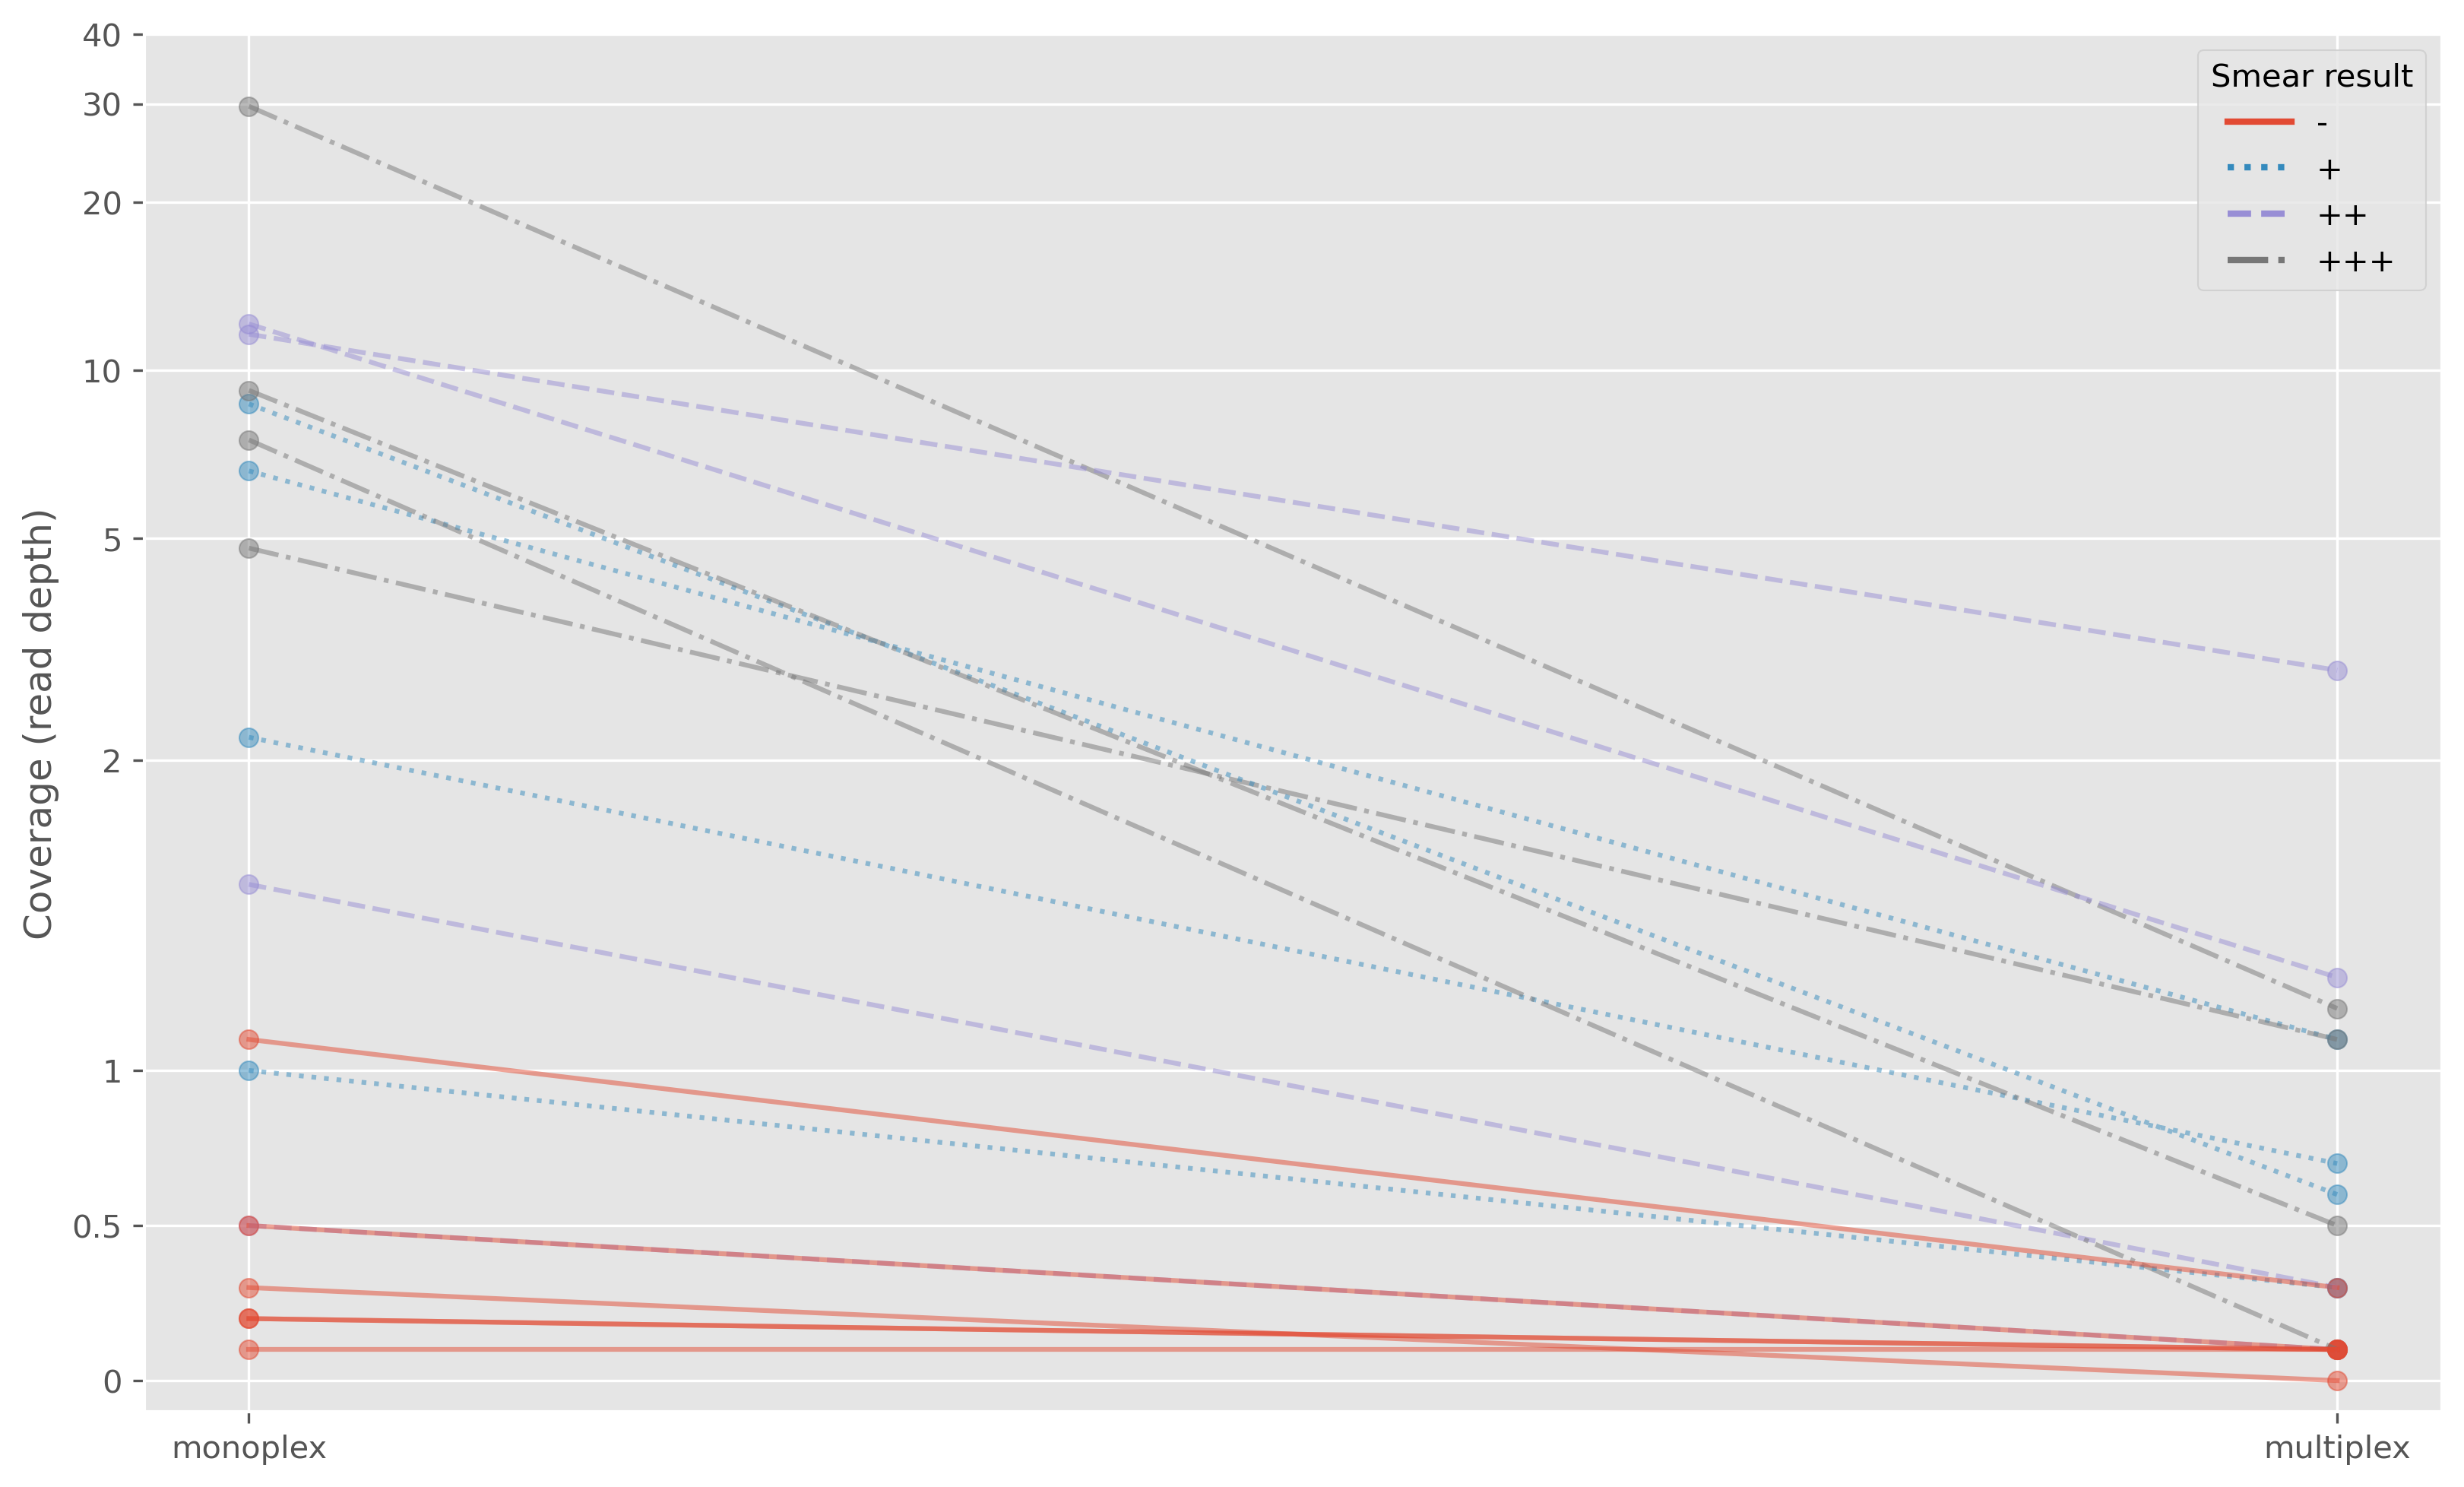

In [23]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=300)
# data = multidf
ggplot_cm = plt.rcParams["axes.prop_cycle"].by_key()["color"]
xs = []
ys = []
xs = {"monoplex": 0, "multiplex": 1}
x = "multiplexed"
y = "coverage"
styles = ["-", ":", "--", "-."]
for i in range(0, len(data), 2):
    this_row = data.iloc[i]
    next_row = data.iloc[i+1]
    assert this_row["name"] == next_row["name"]
    colour = ggplot_cm[this_row["smear"].count("+")]
    style = styles[this_row["smear"].count("+")]
    ax.scatter([xs[this_row[x]], xs[next_row[x]]], [this_row[y], next_row[y]], color=colour, alpha=0.5)
    ax.plot([xs[this_row[x]], xs[next_row[x]]], [this_row[y], next_row[y]], color=colour, alpha=0.5, linestyle=style)
    ax.set_yscale("symlog")
    ticks = [0, 0.5, 1, 2, 5, 10, 20, 30, 40]
    ax.set_yticks(ticks)
    _ = ax.set_yticklabels(ticks)

    ax.set_ylim((-0.1, 40))
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

patches = [mlines.Line2D([], [], color=ggplot_cm[s.count("+")], lw=2, ls=styles[s.count("+")], label=s) for s in ["-", "+", "++", "+++"]]
ax.set_xticks([0, 1])
ax.set_xticklabels(["monoplex", "multiplex"])
ax.set_ylabel("Coverage (read depth)")
plt.legend(handles=patches, title="Smear result")
for label in (ax.get_xticklabels() + ax.get_xticklabels()):
    label.set_fontsize(lsize)
ax.yaxis.set_tick_params(labelsize=lsize)

Summary tables

In [24]:
is_multiplex = ["multi" in s for s in comp_df["sample"]]
comp_df["is_multiplex"] = is_multiplex

In [25]:
comp_df.query("source=='sputum'").groupby(["smear", "technology", "is_multiplex"])["coverage"].describe()[["count", "50%", "min", "max"]]

count   50%  min    max
smear technology is_multiplex                         
+     illumina   False          27.0  1.00  0.1   23.9
      nanopore   False          20.0  0.85  0.0  108.8
                 True            4.0  0.65  0.3    1.1
++    illumina   False          23.0  2.00  0.1   12.1
      nanopore   False          20.0  1.60  0.2  119.3
                 True            4.0  0.80  0.1    2.9
+++   illumina   False          28.0  2.30  0.1  100.0
      nanopore   False          20.0  6.55  0.0   59.2
                 True            4.0  0.80  0.1    1.2
-     illumina   False          12.0  0.50  0.0    1.9
      nanopore   False          12.0  0.20  0.0    1.1
                 True            6.0  0.10  0.0    0.3

In [26]:
nanoq_tsvs = Path("../../results/nanopore/summary/").rglob("*.tsv")
dfs = []
for p in nanoq_tsvs:
    sample = p.name.split(".")[0]
    is_multi = "multi" in sample
    name = sample_name(sample)
    frame = pd.read_csv(p, sep=" ")
    frame["sample"] = sample
    frame["is_multiplex"] = is_multi
    smears = list(set(comp_df.query("sample==@name")["smear"]))
    assert len(smears) == 1, p
    frame["smear"] = smears[0]
    frame["technology"] = "nanopore"
    dfs.append(frame)
nanoq_df = pd.concat(dfs)
nanoq_df

,reads,bases,n50,longest,shortest,mean_length,median_length,mean_quality,median_quality,sample,is_multiplex,smear,technology
0,8327,9531509,1805,9449,110,1144,767,13.2,13.0,P219,False,++,nanopore
0,7710,21012223,3938,14115,179,2725,2322,14.3,14.4,Test_36-singleplex,False,+++,nanopore
0,2376,7025375,4538,14220,81,2956,2526,15.2,15.5,Test_48,False,++,nanopore
0,269,665875,4028,9436,213,2475,1877,13.7,13.9,Test_32,False,+,nanopore
0,67,106093,3442,7960,166,1583,583,13.4,13.3,PCtrl-4,False,-,nanopore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3867,8149217,3485,18620,86,2107,1635,15.3,15.4,Test_40,False,++,nanopore
0,114,204774,2662,5366,119,1796,1592,13.1,12.7,PCtrl-1-multiplex,True,-,nanopore
0,199920,261246021,1780,12685,112,1306,1104,13.9,13.9,P230,False,+++,nanopore
0,3801,4182133,1704,6962,53,1100,776,14.3,14.3,P224,False,+++,nanopore


In [27]:
data = comp_df
for smear in ["+", "++", "+++"]:
    print(smear)
    for tech in ["illumina", "nanopore"]:
        print(tech)
        for is_multi in [False, True]:
            for y in [1, 5, 20]:
                qry = "technology==@tech and smear==@smear and is_multiplex==@is_multi"
                d_total = data.query(qry)
                if d_total.empty:
                    continue
                else:
                    print(is_multi)
                d = d_total.query("coverage>=@y")
                p = len(d) / len(d_total)
                print(f"{p:.1%} ({len(d)}/{len(d_total)}) samples have coverage >= {y}")

+
illumina
False
69.8% (30/43) samples have coverage >= 1
False
46.5% (20/43) samples have coverage >= 5
False
39.5% (17/43) samples have coverage >= 20
nanopore
False
50.0% (10/20) samples have coverage >= 1
False
25.0% (5/20) samples have coverage >= 5
False
5.0% (1/20) samples have coverage >= 20
True
25.0% (1/4) samples have coverage >= 1
True
0.0% (0/4) samples have coverage >= 5
True
0.0% (0/4) samples have coverage >= 20
++
illumina
False
85.0% (34/40) samples have coverage >= 1
False
57.5% (23/40) samples have coverage >= 5
False
42.5% (17/40) samples have coverage >= 20
nanopore
False
65.0% (13/20) samples have coverage >= 1
False
20.0% (4/20) samples have coverage >= 5
False
10.0% (2/20) samples have coverage >= 20
True
50.0% (2/4) samples have coverage >= 1
True
0.0% (0/4) samples have coverage >= 5
True
0.0% (0/4) samples have coverage >= 20
+++
illumina
False
80.0% (40/50) samples have coverage >= 1
False
56.0% (28/50) samples have coverage >= 5
False
52.0% (26/50) samples

In [28]:
illumina_read_length = 150

Remove culture isolates, negative smear, and replicates

In [29]:
summary = comp_df.query("source=='sputum' and smear!='-'")

In [30]:
summary = summary.loc[~summary["sample"].str.contains("_rep")]

In [31]:
summary.set_index(["sample", "technology"], inplace=True, verify_integrity=True)

In [32]:
nanoq_df

,reads,bases,n50,longest,shortest,mean_length,median_length,mean_quality,median_quality,sample,is_multiplex,smear,technology
0,8327,9531509,1805,9449,110,1144,767,13.2,13.0,P219,False,++,nanopore
0,7710,21012223,3938,14115,179,2725,2322,14.3,14.4,Test_36-singleplex,False,+++,nanopore
0,2376,7025375,4538,14220,81,2956,2526,15.2,15.5,Test_48,False,++,nanopore
0,269,665875,4028,9436,213,2475,1877,13.7,13.9,Test_32,False,+,nanopore
0,67,106093,3442,7960,166,1583,583,13.4,13.3,PCtrl-4,False,-,nanopore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3867,8149217,3485,18620,86,2107,1635,15.3,15.4,Test_40,False,++,nanopore
0,114,204774,2662,5366,119,1796,1592,13.1,12.7,PCtrl-1-multiplex,True,-,nanopore
0,199920,261246021,1780,12685,112,1306,1104,13.9,13.9,P230,False,+++,nanopore
0,3801,4182133,1704,6962,53,1100,776,14.3,14.3,P224,False,+++,nanopore


Add read length

In [33]:
for i, row in nanoq_df.iterrows():
    sample = row["sample"]
    if summary.query("sample==@sample").empty:
        continue
    try:
        summary.at[(sample, "nanopore"), "length"] = row["median_length"]
    except KeyError:
        continue

In [34]:
summary.fillna(illumina_read_length, inplace=True)

Write pandas table to Word document: https://stackoverflow.com/a/40597684/5299417

In [35]:
import docx
from itertools import product

In [75]:
smears = ["+", "++", "+++"]
tech = ["illumina", "nanopore"]
multi = [False, True]
rows = defaultdict(str)
delim = "\t"
headers = [delim, delim]
combinations = [("illumina", "+", False), 
                ("illumina", "++", False), 
                ("illumina", "+++", False), 
                ("nanopore", "+", False), 
                ("nanopore", "++", False), 
                ("nanopore", "+++", False), 
                ("nanopore", "+", True), 
                ("nanopore", "++", True), 
                ("nanopore", "+++", True)]
for t, s, m in combinations:
    if (t, m) == ("illumina", True):
        continue
    tech_df = summary.query("technology==@t and is_multiplex==@m")
    if s == '+':
        headers[0] += f"{t.capitalize()} (n={len(tech_df)}){delim*3}"
    smear_df = tech_df.query("smear==@s")
    headers[1] += f"{s.count('+')}+ (n={len(smear_df)}){delim}"
    # total sequenced reads
    totals = smear_df["total"]
    rows["Total reads [median (range)]"] += f"{delim}{int(totals.median())} ({int(totals.min())}-{int(totals.max())})"
    # read length
    if t == "illumina":
        rows["Read length [median (range)]"] += f"{delim}{illumina_read_length}"
    else:
        subdf = nanoq_df.query("is_multiplex==@m and smear==@s")
        lens = nanoq_df["median_length"]
        rows["Read length [median (range)]"] += f"{delim}{int(lens.median())} ({int(lens.min())}-{int(lens.max())})"
    # contamination reads
    contam = smear_df["contam"]
    rows["Contamination reads [median (range)]"] += f"{delim}{int(contam.median())} ({int(contam.min())}-{int(contam.max())})"
    # mtbc reads
    keep = smear_df["keep"]
    rows["MTB reads [median (range)]"] += f"{delim}{int(keep.median())} ({int(keep.min())}-{int(keep.max())})"
    # average depth
    covg = smear_df["coverage"]
    rows["Coverage [median (range)]"] += f"{delim}{round(covg.median(), 1)} ({covg.min()}-{covg.max()})"
    
for y in [1, 5, 20]:
    for t, s, m in combinations:
        tech_df = summary.query("technology==@t and is_multiplex==@m")
        smear_df = tech_df.query("smear==@s")
        if (t, m) == ("illumina", True):
            continue

        covdf = smear_df.query("coverage>=@y")
        p = len(covdf) / len(smear_df)
        rows[f">={y}X coverage"] += f"{delim}{len(covdf)} ({p:.0%})"

In [76]:
for k in rows:
    print(k)

Total reads [median (range)]
Read length [median (range)]
Contamination reads [median (range)]
MTB reads [median (range)]
Coverage [median (range)]
>=1X coverage
>=5X coverage
>=20X coverage


In [77]:
with open("composition_summary.tsv", "w") as fp:
    for l in headers:
        print(l, file=fp)
    for k, row in rows.items():
        print(f"{k}{row}", file=fp)

In [84]:
for s in comp_df["sample"]:
    print(s)

P201
P202
P203-multiplex
P203-singleplex
P204
P205-multiplex
P205-singleplex
P206
P207
P208
P209
P210
P211-multiplex
P211-singleplex
P212
P213-multiplex
P213-singleplex
P214
P215
P216
P217
P218
P219
P220
P221
P222-multiplex
P222-singleplex
P223
P224
P225-multiplex
P225-singleplex
P226
P227
P228
P229
P230
PCtrl-1-multiplex
PCtrl-1-singleplex
PCtrl-2
PCtrl-3-multiplex
PCtrl-3-singleplex
PCtrl-4
PCtrl-5-multiplex
PCtrl-5-singleplex
PCtrl-6
Test_15-multiplex
Test_15-singleplex
Test_16
Test_18
Test_19
Test_20
Test_22
Test_23
Test_28-multiplex
Test_28-singleplex
Test_32
Test_34
Test_36-multiplex
Test_36-singleplex
Test_37
Test_38
Test_40
Test_41
Test_42-multiplex
Test_42-singleplex
Test_43-multiplex
Test_43-singleplex
Test_45
Test_46
Test_47
Test_48
Test_50
Test_51
Test_52
Test_53
Test_54-multiplex
Test_54-singleplex
Test_55
Test_56
Test_60
Test_65
Test_NC1-multiplex
Test_NC1-singleplex
Test_NC2-multiplex
Test_NC2-singleplex
Test_NC3-multiplex
Test_NC3-singleplex
Test_NC4
Test_NC5
Test_NC6
P